In [4]:
from preamble import *
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

## Ocena i doskonalenie modelu

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# stwórz syntetyczny zestaw danych
X, y = make_blobs(random_state=0)
# podziel dane i etykiety na zestawu uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# utwórz instancję modelu i dopasuj go do zestawu uczącego
logreg = LogisticRegression().fit(X_train, y_train)
# oceń model na zestawie testowym
print("Wynik na zestawie testowym: {:.2f}".format(logreg.score(X_test, y_test)))

Wynik na zestawie testowym: 0.88


### Walidacja krzyżowa

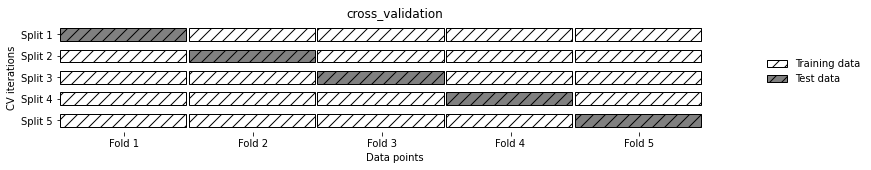

In [3]:
mglearn.plots.plot_cross_validation()

#### Walidacja krzyżowa w scikit-learn

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Wynik walidacji krzyżowej: {}".format(scores))

Wynik walidacji krzyżowej: [0.967 1.    0.933 0.967 1.   ]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Wynik walidacji krzyżowej: {}".format(scores))

Wynik walidacji krzyżowej: [0.967 1.    0.933 0.967 1.   ]


In [6]:
print("Średni wynik walidacji krzyżowej: {:.2f}".format(scores.mean()))

Średni wynik walidacji krzyżowej: 0.97


In [7]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.016, 0.016, 0.016, 0.022, 0.   ]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([0.967, 1.   , 0.933, 0.967, 1.   ]),
 'train_score': array([0.967, 0.967, 0.983, 0.983, 0.975])}

In [8]:
res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.02,0.0,0.97,0.97
1,0.02,0.0,1.00,0.97
2,0.02,0.0,0.93,0.98
3,0.02,0.0,0.97,0.98
4,0.00,0.0,1.00,0.97


Mean times and scores:
 fit_time       0.01
score_time     0.00
test_score     0.97
train_score    0.97
dtype: float64


#### Korzyści z walidacji krzyżowej

### Stratyfikowana k-krotna walidacja krzyżowa i inne strategie

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Etykiety irysów:\n{}".format(iris.target))

Etykiety irysów:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


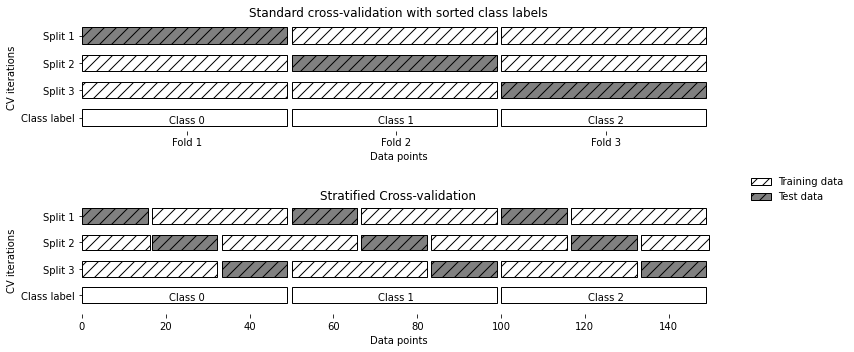

In [10]:
mglearn.plots.plot_stratified_cross_validation()

#### Większa kontrola nad walidacją krzyżową

In [11]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [12]:
print("Wynik walidacji krzyżowej:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Wynik walidacji krzyżowej:
[1.    1.    0.867 0.933 0.833]


In [13]:
kfold = KFold(n_splits=3)
print("Wynik walidacji krzyżowej:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Wynik walidacji krzyżowej:
[0. 0. 0.]


In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Wynik walidacji krzyżowej:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Wynik walidacji krzyżowej:
[0.98 0.96 0.96]


#### Walidacja krzyżowa z pominięciem

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Liczba iteracji cv: ", len(scores))
print("Średnia dokładność: {:.2f}".format(scores.mean()))

Liczba iteracji cv:  150
Średnia dokładność: 0.97


#### Walidacja krzyżowa z podziałem losowym

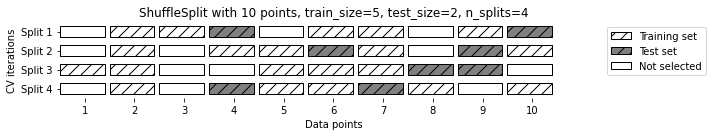

In [16]:
mglearn.plots.plot_shuffle_split()

In [17]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Wynik walidacji krzyżowej:\n{}".format(scores))

Wynik walidacji krzyżowej:
[0.933 0.96  0.973 0.96  0.907 0.973 0.987 0.96  0.973 0.947]


##### Walidacja krzyżowa z grupami

In [18]:
from sklearn.model_selection import GroupKFold
# stwórz syntetyczny zestaw danych
X, y = make_blobs(n_samples=12, random_state=0)
# załóżmy, że pierwsze trzy próbki należą do tej samej grupy,
# następnie następne cztery do następnej itd.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Wynik walidacji krzyżowej:\n{}".format(scores))

Wynik walidacji krzyżowej:
[0.75  0.6   0.667]


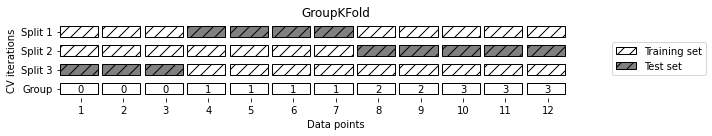

In [19]:
mglearn.plots.plot_group_kfold()

### Przeszukiwanie siatki

#### Proste przeszukiwanie siatki

In [20]:
# naiwna implementacja wyszukiwania w sieci
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Wielkość zestawu uczącego: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # Wytrenuj SVC dla każdej kombinacji parametrów
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # oceń SVC na zestawie testowym
        score = svm.score(X_test, y_test)
        # ijeśli uzyskano lepszy wynik, zapisz wynik i parametry
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Najlepszy wynik: {:.2f}".format(best_score))
print("Najlepsze parametry: {}".format(best_parameters))

Wielkość zestawu uczącego: 112   size of test set: 38
Najlepszy wynik: 0.97
Najlepsze parametry: {'C': 100, 'gamma': 0.001}


#### Nadmierne dopasowanie parametrów i zestaw walidacyjny

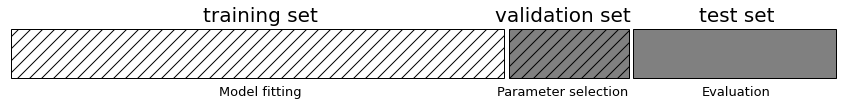

In [21]:
mglearn.plots.plot_threefold_split()

In [22]:
from sklearn.svm import SVC
# podziel dane na zestawy uczący+walidacyjny oraz zestaw testowy
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# podziel zestaw uczący+walidacyjny na zestawy uczący i walidacyjny
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Wielkość zestawu uczącego: {} wielkość zestawu walidacyjnego: {} wielkość zestawu testowego:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # ucz model SVC na każdej kombinacji parametrów
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # oceń model SVC na zestawie testowym
        score = svm.score(X_valid, y_valid)
        # jeśli uzyskano lepszy wynik, zapisz wynik i parametry
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# przebuduj model na połączonym zestawie uczącym i walidacyjnym,
# i oceń go na zestawie testowym
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Najlepszy wynik na zestawie walidacyjnym: {:.2f}".format(best_score))
print("Najlepsze parametry: ", best_parameters)
print("Wynik na zestawie testowym z najlepszymi parametrami: {:.2f}".format(test_score))

Wielkość zestawu uczącego: 84 wielkość zestawu walidacyjnego: 28 wielkość zestawu testowego: 38

Najlepszy wynik na zestawie walidacyjnym: 0.96
Najlepsze parametry:  {'C': 10, 'gamma': 0.001}
Wynik na zestawie testowym z najlepszymi parametrami: 0.92


#### Przeszukiwanie siatki z walidacją krzyżową

In [23]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # dla każdej kombinacji parametrów ucz model SVC
        svm = SVC(gamma=gamma, C=C)
        # wykonaj walidację krzyżową
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # oblicz średnią dokładność walidacji krzyżowej
        score = np.mean(scores)
        # jeśli uzyskano lepszy wynik, zapisz wynik i parametry
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# przebuduj model na połączonym zestawie danych uczących i walidacyjnych
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [1]:
mglearn.plots.plot_cross_val_selection()

NameError: name 'mglearn' is not defined

In [ ]:
mglearn.plots.plot_grid_search_overview()

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Siatka parametrów:\n{}".format(param_grid))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Wynik na zestawie testowym: {:.2f}".format(grid_search.score(X_test, y_test)))

In [ ]:
print("Najlepsze parametry: {}".format(grid_search.best_params_))
print("Najlepszy wynik walidacji krzyżowej: {:.2f}".format(grid_search.best_score_))


In [ ]:
print("Najlepszy estymator:\n{}".format(grid_search.best_estimator_))

##### Analiza wyniku walidacji krzyżowej

In [ ]:
import pandas as pd
# konwertuj do DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# pokaż pierwszych 5 wierszy
display(results.head())


In [ ]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# umieść na wykresie średnie wyniki walidacji krzyżowej
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # umieść na wykresie średnie wyniki walidacji krzyżowej
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [ ]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

In [ ]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
# wyświetlamy transponowaną tabelę, aby lepiej pasowała do strony:
display(results.T)

#### Korzystanie z różnych strategii walidacji krzyżowej z przeszukiwaniem siatki

#### Zagnieżdżona walidacja krzyżowa

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

In [ ]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # dla każdego podziału danych w zewnętrznej walidacji krzyżowej
    # (metoda split zwraca indeksy)
    for training_samples, test_samples in outer_cv.split(X, y):
        # znajdź najlepszy parametr za pomocą wewnętrznej walidacji krzyżowej
        best_parms = {}
        best_score = -np.inf
        # iteruj po parametrach
        for parameters in parameter_grid:
            # zbieraj punkty na wewnętrznych podziałach
            cv_scores = []
            # iteruj po wewnętrznej walidacji krzyżowej
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # kompilator z podanymi parametrami i danymi uczącymi
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # oceń na wewnętrznym zestawie testowym
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # oblicz średni wynik na wewnętrznych siatkach
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # jeśli wynik jest lepszy niż dotychczas, zapamiętaj parametry
                best_score = mean_score
                best_params = parameters
        # zbuduj klasyfikator na najlepszych parametrach przy użyciu zewnętrznego zestawu uczącego
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # oceń
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)


In [ ]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Wynik walidacji krzyżowej: {}".format(scores))

##### Równoległa walidacja krzyżowa i przeszukiwanie siatki

### Wskaźniki oceny i punktacja
#### Pamiętaj o celu

#### Metryki klasyfikacji binarnej
##### Rodzaje błędów
##### Niezbalansowane zestawy danych

from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unikalne prognozowane etykiety: {}".format(np.unique(pred_most_frequent)))
print("Wynik na zestawie testowym: {:.2f}".format(dummy_majority.score(X_test, y_test)))



In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Wynik na zestawie testowym: {:.2f}".format(tree.score(X_test, y_test)))

In [ ]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("wynik DummyClassifier: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("wynik LogisticRegression: {:.2f}".format(logreg.score(X_test, y_test)))


##### Macierze błędu

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Macierz błędu:\n{}".format(confusion))

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

In [ ]:
print("Najczęściej występująca klasa:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nFałszywy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDrzewo decyzyjne:")
print(confusion_matrix(y_test, pred_tree))
print("\nRegresja logistyczna")
print(confusion_matrix(y_test, pred_logreg))


###### Związek z dokładnością
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

##### Precyzja, czułość i miara F1
\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}
\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

In [ ]:
from sklearn.metrics import f1_score
print("miara f1 dla najczęściej występującej klasy: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("miara f1 dla modelu fałszywego: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("miara f1 dla modelu drzewa: {:.2f}".format(f1_score(y_test, pred_tree)))
print("miara f1 dla modelu regresji logistycznej: {:.2f}".format(f1_score(y_test, pred_logreg)))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

In [ ]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

In [ ]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

##### Branie pod uwagę niepewności

In [ ]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

In [ ]:
mglearn.plots.plot_decision_threshold()

In [ ]:
print(classification_report(y_test, svc.predict(X_test)))

In [ ]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [ ]:
print(classification_report(y_test, y_pred_lower_threshold))

##### Krzywe precision-recall i krzywe ROC

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

In [ ]:
# Aby uzyskać gładszą krzywą, użyj większej liczby punktów danych
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# znajdź zakres najbliższy zeru
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="zakres zero", fillstyle="none", c='k', mew=2)
plt.plot(precision, recall, label="krzywa precision-recall")
plt.xlabel("Precyzja")
plt.ylabel("Czułość")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2) rf.fit(X_train, y_train)
# w klasie RandomForestClassifier zaimplementowano metodę predict_proba, ale nie decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label="zakres zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label="zakres 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precyzja")
plt.ylabel("Czułość")
plt.legend(loc="best")


In [ ]:
print("miara F1 dla lasu losowego: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("miara F1 dla svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))


In [ ]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Średnia precyzja lasu losowego: {:.3f}".format(ap_rf))
print("Średnia precyzja svc: {:.3f}".format(ap_svc))


##### Charakterystyka pracy odbiornika (ROC) i AUC\text{FP} + \text{TN}}
\end{equation}

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# znajdź zakres najbliższy do zera
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label="zakres zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [ ]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="Krzywa ROC SVC")
plt.plot(fpr_rf, tpr_rf, label="Krzywa ROC RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="zakres zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label="zakres 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [ ]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC dla lasu losowego: {:.3f}".format(rf_auc))
print("AUC dla SVC: {:.3f}".format(svc_auc))


In [ ]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Metrics for Multiclass Classification

In [ ]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Dokładność: {:.3f}".format(accuracy_score(y_test, pred)))
print("Macierz błędu:\n{}".format(confusion_matrix(y_test, pred)))


In [ ]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Macierz błędu")
plt.gca().invert_yaxis()


In [ ]:
print(classification_report(y_test, pred))

In [ ]:
print("Średnia miara F1 mikro: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("Średnia miara F1 makro: {:.3f}".format(f1_score(y_test, pred, average="macro")))


#### Metryki regresji

### Używanie metryk oceny w wyborze modelu

In [ ]:
# domyślna metryka klasyfikacji to dokładność
print("Domyślna metryka: {}".format(
cross_val_score(SVC(), digits.data, digits.target == 9)))
# podanie scoring="accuracy" nie zmienia wyników
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring="accuracy")
print("Dokładność przekazana jawnie: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
scoring="roc_auc")
print("Metryka AUC: {}".format(roc_auc))


In [ ]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state=0)
# podajemy złą siatkę, aby zilustrować ten punkt:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# użyj domyślnego sposobu oceniania dokładności:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Przeszukiwanie siatki z dokładnością")
print("Najlepsze parametry:", grid.best_params_)
print("Najlepszy wynik walidacji krzyżowej (dokładność): {:.3f}".format(grid.best_score_))
print("Zestaw testowy AUC: {:.3f}".format(roc_auc_score(y_test, grid.decision_function(X_test))))
print("Dokładność na zestawie testowym: {:.3f}".format(grid.score(X_test, y_test)))


In [ ]:
# użyj sposobu oceniania AUC:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nPrzeszukiwanie siatki z AUC")
print("Najlepsze parametry:", grid.best_params_)
print("Najlepszy wynik walidacji krzyżowej (AUC): {:.3f}".format(grid.best_score_)) print("Zestaw testowy AUC: {:.3f}".format(
roc_auc_score(y_test, grid.decision_function(X_test))))
print("Dokładność na zestawie testowym: {:.3f}".format(grid.score(X_test, y_test)))


In [ ]:
from sklearn.metrics import SCORERS
print("Dostępne metryki:")
print(sorted(SCORERS.keys()))

### Podsumowanie i przegląd